<a href="https://colab.research.google.com/github/ArjunGhosh561/FashionGAN/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ArjunGhosh561/FashionGAN.git

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
for gpu in gpus:
    print(gpu)

In [6]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt


In [7]:
ds = tfds.load('fashion_mnist',split='train')

In [8]:
ds.as_numpy_iterator().next()['label']

2

In [9]:
import numpy as np


In [10]:
dataiterator = ds.as_numpy_iterator()

In [11]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

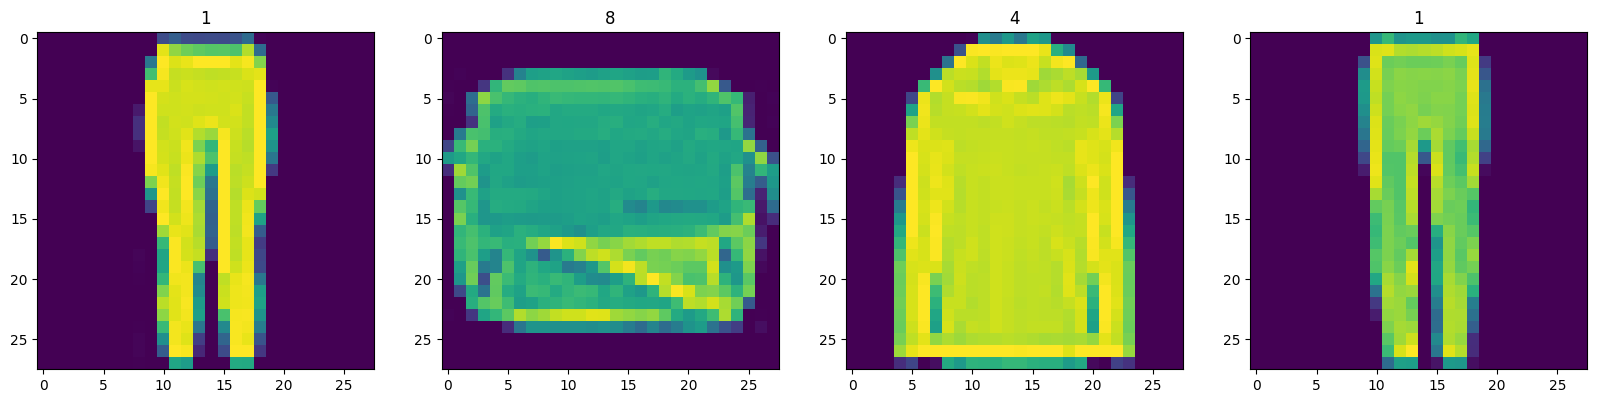

In [12]:
#plotting images
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
  sample = dataiterator.next()
  ax[idx].imshow(np.squeeze(sample['image']))
  ax[idx].title.set_text(sample['label'])



In [13]:
#scale and return images only
def scale_images(data):
  image = data['image']
  return image/255




In [14]:
ds = tfds.load('fashion_mnist',split='train')
ds= ds.map(scale_images)
ds=ds.cache()
ds=ds.shuffle(60000)
ds=ds.batch(128)
ds=ds.prefetch(64)


In [15]:
#import modelling  components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Reshape,LeakyReLU, Dropout,UpSampling2D

In [32]:
def build_generator():
      model = Sequential()
      model.add(Dense(7*7*128,input_dim=128))
      model.add(LeakyReLU(0.2))
      model.add(Reshape((7,7,128)))

      #Upsample block 1
      model.add(UpSampling2D())
      model.add(Conv2D(128,5,padding='same'))
      model.add(LeakyReLU(0.2))


      #Upsample block 1
      model.add(UpSampling2D())
      model.add(Conv2D(128,5,padding='same'))
      model.add(LeakyReLU(0.2))

      #Convolutional  block 1
      model.add(Conv2D(128,4,padding='same'))
      model.add(LeakyReLU(0.2))

      #Convolutional block 2
      model.add(Conv2D(128,4,padding='same'))
      model.add(LeakyReLU(0.2))


      #Output layer
      model.add(Conv2D(1,4,padding='same',activation='sigmoid'))

      return model







In [33]:
generator = build_generator()


In [34]:
generator.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_4 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_8 (UpSamplin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [77]:
img = generator.predict(np.random.randn(4,128,1))


1/1 [==============================] - 0s 128ms/step


In [59]:
img

array([[[[0.5047324 ],
         [0.4999927 ],
         [0.5000775 ],
         ...,
         [0.503139  ],
         [0.50274724],
         [0.49997875]],

        [[0.49969843],
         [0.50472236],
         [0.50374   ],
         ...,
         [0.5074322 ],
         [0.5064739 ],
         [0.50094265]],

        [[0.5126019 ],
         [0.5150023 ],
         [0.5127351 ],
         ...,
         [0.5073101 ],
         [0.5034723 ],
         [0.49899954]],

        ...,

        [[0.496523  ],
         [0.49607882],
         [0.49826998],
         ...,
         [0.5103171 ],
         [0.50475496],
         [0.5022573 ]],

        [[0.49711916],
         [0.5014316 ],
         [0.49863094],
         ...,
         [0.5049281 ],
         [0.50110114],
         [0.5012451 ]],

        [[0.501465  ],
         [0.49982253],
         [0.49715835],
         ...,
         [0.49831316],
         [0.49637792],
         [0.50056773]]],


       [[[0.49799672],
         [0.5071547 ],
         [0.49

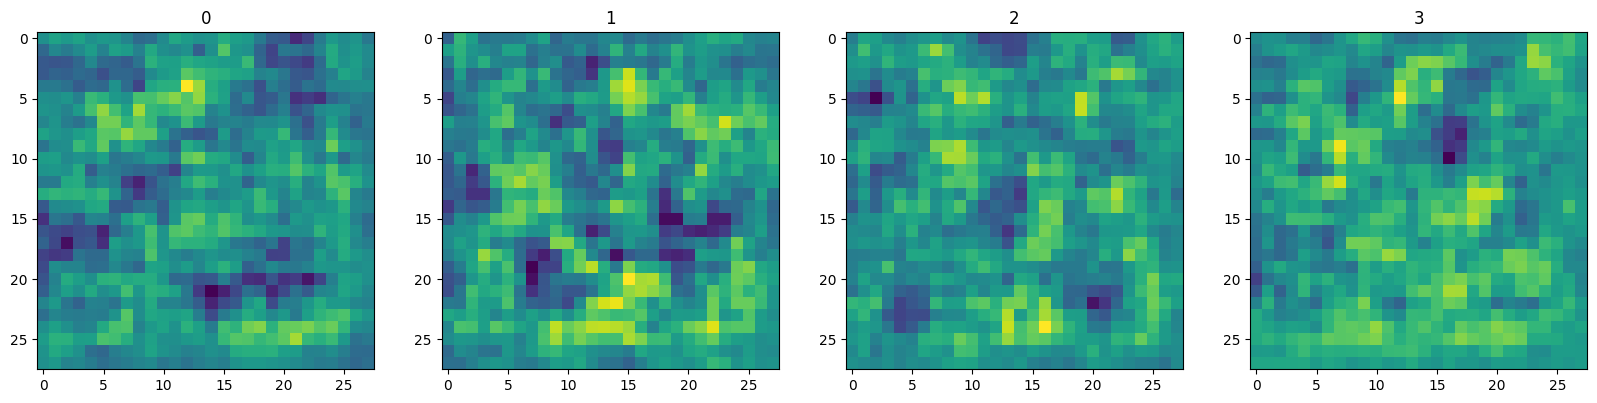

In [69]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(img):

  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)



In [72]:
#build discriminator

def build_discriminator():

  #First Conv layer
  model= Sequential()
  model.add(Conv2D(32,5,input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Second CONV layer
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Third Conv layer
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #4th Conv layer
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Flatten
  model.add(Flatten())
  model.add(Dropout(0.4))
  #Output layer
  model.add(Dense(1,activation='sigmoid'))

  return model




In [75]:
discriminator = build_discriminator()


In [63]:
discriminator.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_33 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_11 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_34 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_12 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 16, 16, 128)      

In [79]:
discriminator.predict(img)

1/1 [==============================] - 0s 82ms/step


array([[0.5007003 ],
       [0.5004948 ],
       [0.5005727 ],
       [0.50058585]], dtype=float32)